In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [2]:
input=df.drop(['label'],axis='columns')
input

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [16]:
target=df['label']
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

<BarContainer object of 2200 artists>

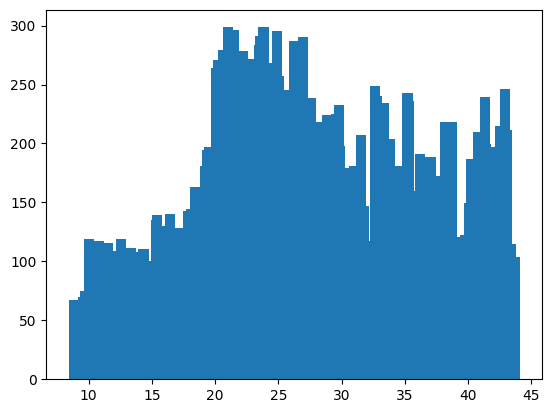

In [ ]:
plt.bar(df.temperature,df.rainfall)


In [ ]:
avg_npk=df.groupby('label')[['N','P','K']].mean()
avg_npk

,N,P,K
label,,,
apple,20.80,134.22,199.89
banana,100.23,82.01,50.05
blackgram,40.02,67.47,19.24
chickpea,40.09,67.79,79.92
coconut,21.98,16.93,30.59
coffee,101.20,28.74,29.94
cotton,117.77,46.24,19.56
grapes,23.18,132.53,200.11
jute,78.40,46.86,39.99


In [10]:
print(avg_npk.max())

N    117.77
P    134.22
K    200.11
dtype: float64


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
df['label_n']=le.fit_transform(df['label'])
df
targets=df['label_n']
targets

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label_n, Length: 2200, dtype: int64

In [57]:
avg_npk=df.groupby(['label','label_n'])[['N','P','K']].mean()
avg_npk

,,N,P,K
label,label_n,,,
apple,0,20.80,134.22,199.89
banana,1,100.23,82.01,50.05
blackgram,2,40.02,67.47,19.24
chickpea,3,40.09,67.79,79.92
coconut,4,21.98,16.93,30.59
coffee,5,101.20,28.74,29.94
cotton,6,117.77,46.24,19.56
grapes,7,23.18,132.53,200.11
jute,8,78.40,46.86,39.99


In [28]:
avg_npks=df.groupby('label_n')[['N','P','K']].mean()
avg_npks

,N,P,K
label_n,,,
0,20.80,134.22,199.89
1,100.23,82.01,50.05
2,40.02,67.47,19.24
3,40.09,67.79,79.92
4,21.98,16.93,30.59
5,101.20,28.74,29.94
6,117.77,46.24,19.56
7,23.18,132.53,200.11
8,78.40,46.86,39.99


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,targets,test_size=0.2)


In [32]:
model=LogisticRegression()
model.fit(x_train,y_train)


C:\Users\aaradhya\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
model.score(x_test,y_test)

0.9295454545454546

In [36]:
codel=RandomForestClassifier()
codel.fit(x_train,y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
codel.score(x_test,y_test)

0.9954545454545455

In [54]:
print(x_test)

       N    P    K  temperature   humidity        ph    rainfall
117   61   41   17    25.142061  65.261851  6.021902   76.684560
1104   0   21   32    35.898556  54.259642  6.430139   92.197217
1763  70   65   52    30.420121  93.126598  6.583529   75.952950
59    99   55   35    21.723831  80.238990  6.501698  277.962619
368   18   74   15    24.903582  22.275127  5.708366  146.472724
...   ..  ...  ...          ...        ...       ...         ...
1679  13   22    5    19.667056  90.500967  7.764040  100.173796
1672  20   20   10    11.866319  93.683946  6.976998  106.060149
670   20   41   20    29.273086  89.487502  7.073048   50.924655
1654  33   15    7    15.833887  91.682939  7.651225  109.757142
1522   2  143  196    22.712713  90.452617  5.669489  109.885260

[440 rows x 7 columns]


In [65]:
y_pred=model.predict(x_test)
y_pred

array([11, 12, 17, 20,  9, 11,  4, 11, 19,  7, 13,  5, 18,  9,  7,  7,  9,
       13, 13, 16,  1, 12, 19,  5,  8,  6,  4,  2,  3, 11,  5,  0,  3, 16,
        7,  7,  8,  6, 15, 20, 20,  1, 18,  6, 14, 16, 14,  7,  9, 17,  4,
       18,  9, 20,  7, 15,  1, 18, 10,  3, 16,  0, 14, 18,  2, 18, 11, 12,
        0, 14, 21, 19,  9, 11, 14, 19, 10, 16,  8, 21, 10, 17, 21,  3,  3,
        5, 17, 14, 20,  5,  5,  0,  2, 14, 21, 21,  2,  5,  9, 12, 15, 11,
        2,  2, 13, 19, 18, 17,  8, 15, 11,  6,  9,  8, 16,  7, 19, 11, 19,
       17, 14, 10, 13, 19, 21, 11, 16,  4, 20, 21, 18,  5, 15, 16,  6,  6,
        2,  7, 10, 12, 20, 13,  1, 18,  4,  5,  8,  4,  4,  8, 20,  0, 12,
       12, 17,  0, 10,  0,  6,  1, 13, 17, 19, 10, 13, 17, 18, 13, 14,  2,
       15, 20,  3, 18, 12, 20,  5,  9, 16, 21, 21, 21, 18, 19,  5, 19,  8,
       13,  5, 18,  3, 12, 13,  6, 13, 21, 13,  6,  7, 18,  9,  9, 13,  9,
       14,  6, 13, 11,  1, 16,  7,  5,  2,  3,  2,  7, 21, 15,  1, 12,  7,
        9, 18, 12, 20,  8

In [72]:
from sklearn.metrics import accuracy_score
ant=accuracy_score(y_test,y_pred)
ant

0.9295454545454546

In [61]:
brode=SVC()
brode.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [62]:
brode.score(x_test,y_test)

0.9704545454545455

In [63]:
from sklearn.tree import DecisionTreeClassifier
todel=DecisionTreeClassifier()
todel.fit(x_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
todel.score(x_test,y_test)

0.990909090909091